In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns
sns.set_style('darkgrid')

In [5]:
file = r'C:\Users\hp\Desktop\Statewise_Elementary.csv'
data = pd.read_csv(file)

In [6]:
data.head()

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,...,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,JAMMU & KASHMIR,22,201,7263,1628,12549,20.05,16.01,...,1014,20491,1946,41171,62474,7878,564,495,24326,2001
1,2015-16,2,HIMACHAL PRADESH,12,124,10120,2243,6857,8.69,11.14,...,652,36054,3053,38307,6930,6909,6498,5445,6151,2717
2,2015-16,3,PUNJAB,22,146,13197,1780,27704,29.82,10.62,...,2754,88618,14200,56222,23531,42532,9244,8406,30835,7218
3,2015-16,4,CHANDIGARH,1,20,84,20,1055,97.25,11.18,...,117,1994,218,135,419,2066,0,36,1398,0
4,2015-16,5,UTTARAKHAND,13,95,11989,995,10117,21.54,13.14,...,1147,12608,1024,48215,14587,7545,12388,6671,1855,3227


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Columns: 816 entries, AC_YEAR to TOTCLS7G
dtypes: float64(8), int64(806), object(2)
memory usage: 229.6+ KB


In [ ]:
#Filter out only the necessary columns for our analysis

In [8]:
col = ['STATNAME', 'DISTRICTS', 'TOTPOPULAT','SCHTOT','SCHTOTG','SCHTOTGR','SCHTOTPR','ENRTOT','ENRTOTG','ENRTOTGR', 
       'ENRTOTPR', 'TCHTOTG', 'TCHTOTP', 'SCLSTOT', 'STCHTOT', 'ROADTOT', 'SPLAYTOT', 'SWATTOT',  'SELETOT',] 

df = pd.DataFrame(data, columns=col)

In [9]:
df.head()

,STATNAME,DISTRICTS,TOTPOPULAT,SCHTOT,SCHTOTG,SCHTOTGR,SCHTOTPR,ENRTOT,ENRTOTG,ENRTOTGR,ENRTOTPR,TCHTOTG,TCHTOTP,SCLSTOT,STCHTOT,ROADTOT,SPLAYTOT,SWATTOT,SELETOT
0,JAMMU & KASHMIR,22,12549,28578,23329,21829,3776,1856776,1024643,951439,515189,98689,59148,2114,1745,22634,10604,26362,8078
1,HIMACHAL PRADESH,12,6857,18024,15386,15014,2258,950766,580395,547430,277699,66338,28524,540,1476,14929,15456,17999,16401
2,PUNJAB,22,27704,28776,20488,18005,3831,3962439,2072324,1560105,755203,128034,106425,562,1583,28650,27853,28771,28757
3,CHANDIGARH,1,1055,201,115,16,1,157921,101884,17869,386,5437,3801,1,0,201,187,201,201
4,UTTARAKHAND,13,10117,23660,17505,16860,4253,1712673,757209,679723,604115,65399,42144,259,1558,18214,13768,22836,16514


In [10]:
##correct the wrong value(population of west bengal)
df.loc[18,'TOTPOPULAT'] = df.loc[18,'TOTPOPULAT']/10

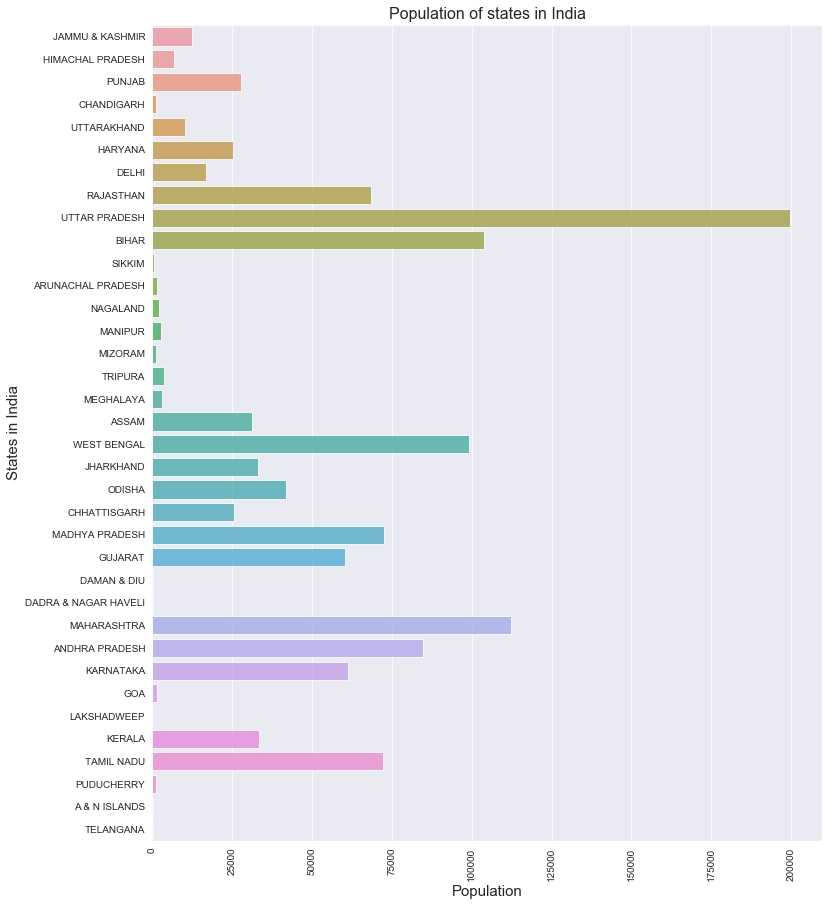

In [13]:
plt.figure(figsize=(12,15))
sns.barplot( df['TOTPOPULAT'],df['STATNAME'], alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Population', fontsize=15)
plt.ylabel('States in India', fontsize=15)
plt.title("Population of states in India", fontsize=16)
plt.show()

The plot provides an overview as to where we can focus our resources, One can invest more in uttar pradesh as the population clearly is an advantage

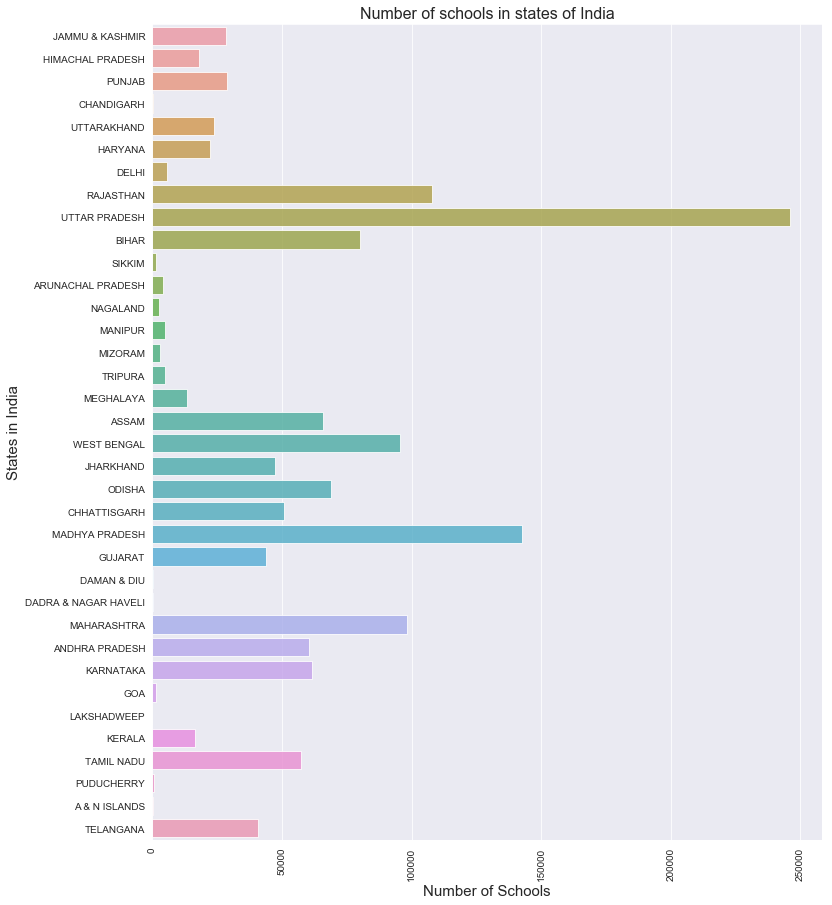

In [17]:
plt.figure(figsize=(12,15))
sns.barplot(df['SCHTOT'], df['STATNAME'],alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Number of Schools', fontsize=15)
plt.ylabel('States in India', fontsize=15)
plt.title("Number of schools in states of India", fontsize=16)
plt.show()

We see a relation i.e population increases the number of schools also increases

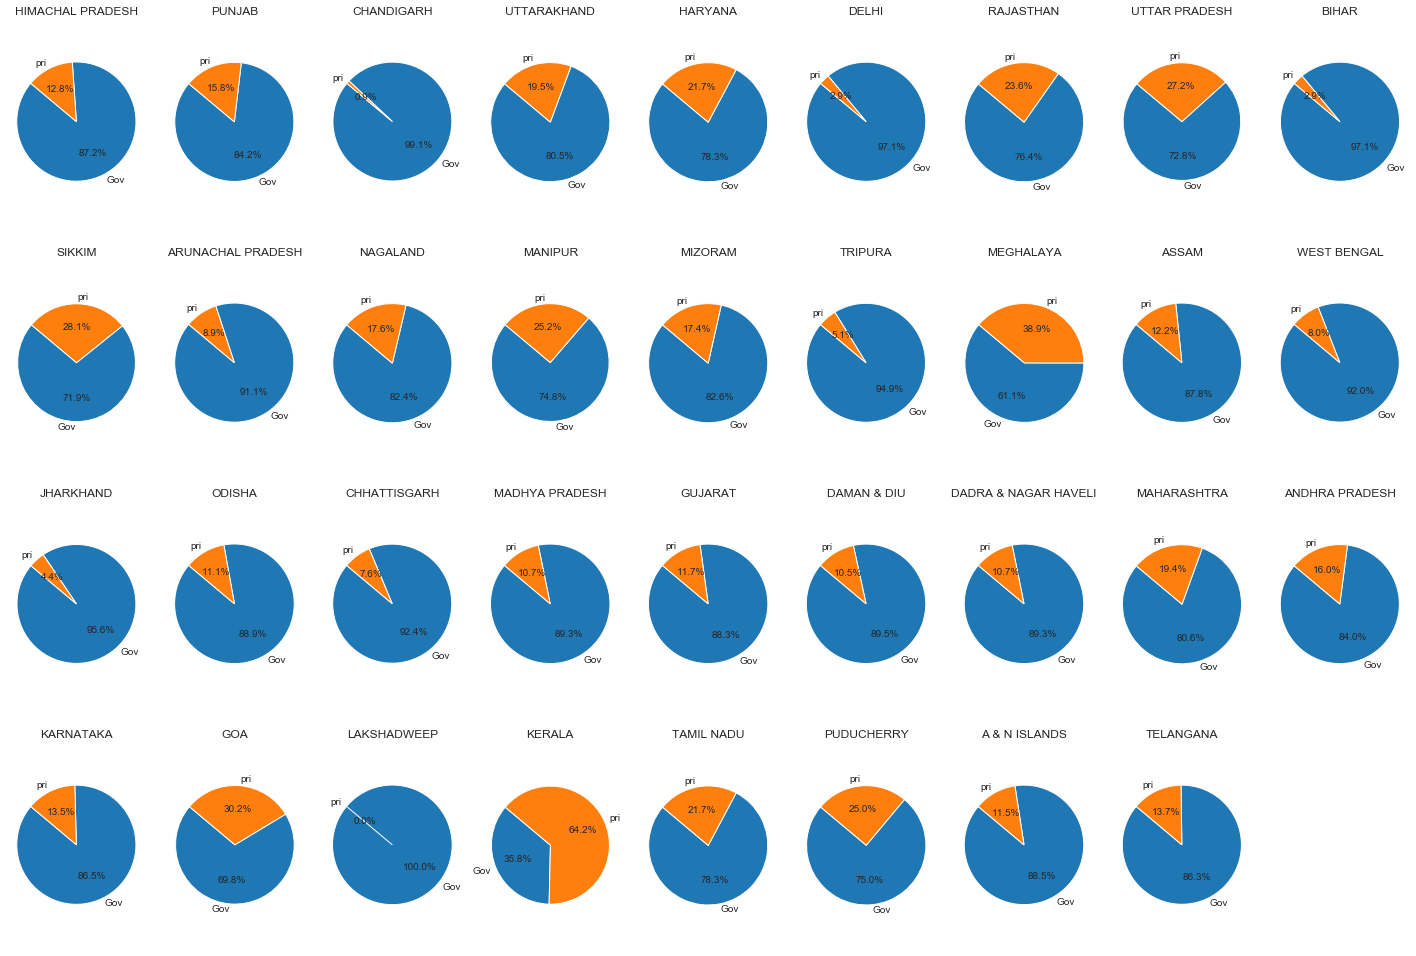

In [19]:
plt.figure(figsize=(25,17))
for i in range(1,len(data)):
    plt.subplot(4,9,i)
    plt.title(df['STATNAME'][i])
    top = ['Gov','pri']
    uttar = data.loc[df['STATNAME'] == df['STATNAME'][i],:]
    value =[float(uttar['SCHTOTG']/uttar['SCHTOT'])*100,float(uttar['SCHTOTPR']/uttar['SCHTOT'])*100]
    plt.pie(value, labels=top, autopct='%1.1f%%',startangle=140)
    plt.axis('equal')
plt.show()

Ratio of government vs private schools with respect to every state in India
1) The number of governments schools is high in almost all states of India (except kerala)
2) 60% of the schools in kerala is private schools, which is unlike any other state ( it is an anamoly)¶
3) Incidentally kerala also has the highest literacy rate among the Indian states
4) In Bihar, which has one of the lowest literacy rates only 3% of the schools are private

Does this mean that a states literacy depends on the number of private educations institutions, We can safely assume that there is a relation (as little as it may seem)

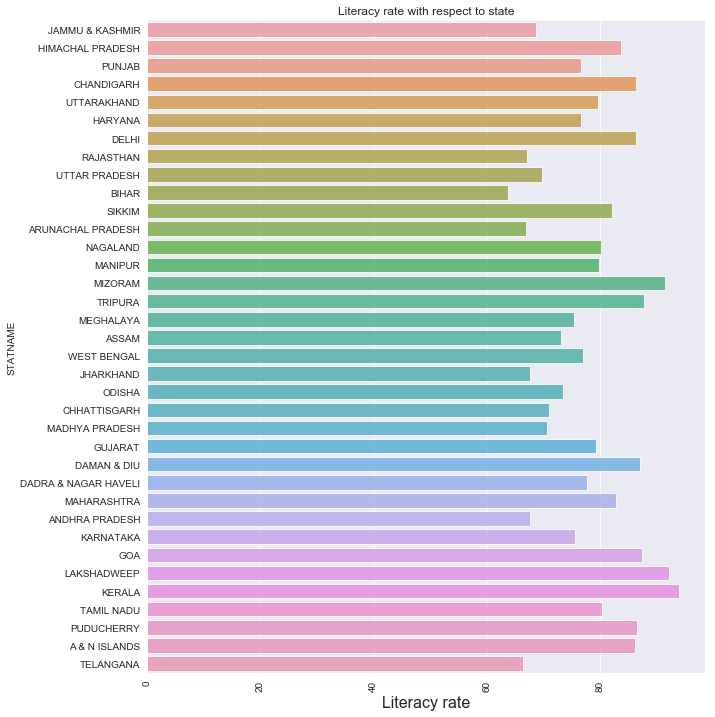

In [20]:
plt.figure(figsize=(10,12))
sns.barplot(data['OVERALL_LI'], data['STATNAME'],alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel("Literacy rate", fontsize=16)
plt.title('Literacy rate with respect to state')
plt.show()

We can see almost all in India states have more than 50% literacy rate

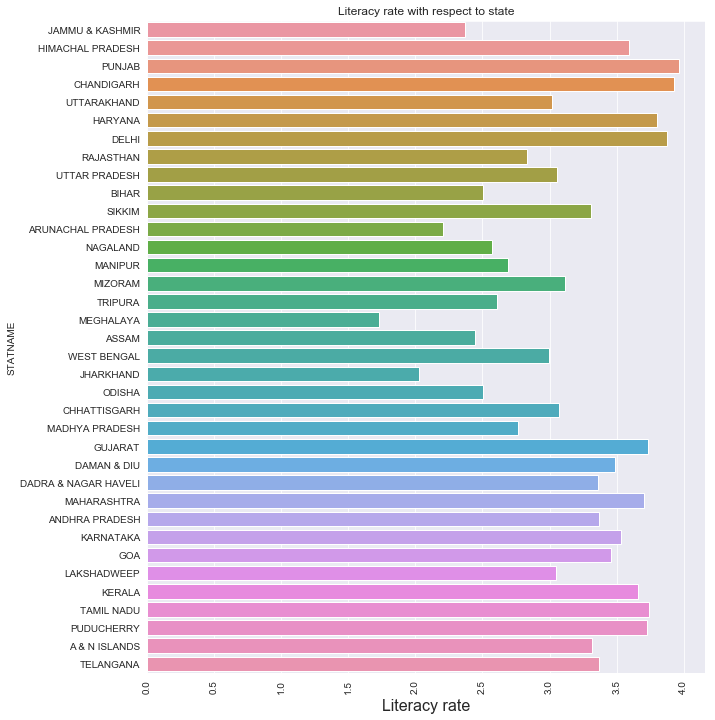

In [21]:
data['good'] = data['ROADTOT'] +data['SPLAYTOT'] + data['SWATTOT'] +data['SELETOT']
data['goodpercent'] = data['good']/data['SCHTOT']
plt.figure(figsize=(10,12))
sns.barplot(data['goodpercent'], data['STATNAME'],alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel("Literacy rate", fontsize=16)
plt.title('Literacy rate with respect to state')
plt.show()

Percentage of schools with Playground Facility and Drinking Water and Electricity and also approachable by All Weather Roads in almost all states in India is < 4% which is pretty low
The percentage of higly equipped schools are highest in the state of punjab and lowest in the state of meghalaya